In [68]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [69]:
df=pd.read_csv('data/auto_data_cleaned.csv')

In [70]:
df.head()

,marque,modele,annee,prix,adresse,kilometrage,boite_vitesse,carburant,proprietaire
0,Citroen,C3,2016,5 000 000,"Thiès, Thiès",150000,Manuelle,Diesel,Bintou Sylla
1,Mitsubishi,Outlander,2016,9 500 000,"VDN, Dakar",115000,Automatique,Essence,Sokhna Faty
2,Renault,megane-3,2013,4 000 000,"Sud Foire, Dakar",260000,Manuelle,Diesel,Gm DK
3,Rover,range,2017,15 499 000,"Médina, Dakar",54000,Automatique,Essence,Chasseur Automobile
4,Ford,Fusion,2013,3 950 000,"Sud Foire, Dakar",80000,Automatique,Essence,Fatou Kiné


In [56]:
df.marque.value_counts()

marque
Ford           840
Hyundai        358
Peugeot        309
Toyota         281
Kia            199
              ... 
Renault Vel      1
Iveco            1
Daihatsu         1
Hummer           1
Peugeot 206      1
Name: count, Length: 71, dtype: int64

In [57]:
df.dtypes

marque           object
modele           object
annee            object
prix             object
adresse          object
kilometrage       int64
boite_vitesse    object
carburant        object
proprietaire     object
dtype: object

In [71]:
df['prix'].isna().sum()

0

In [72]:
df["prix"]

0        5 000 000 
1        9 500 000 
2        4 000 000 
3       15 499 000 
4        3 950 000 
           ...     
3827     5 000 000 
3828     5 400 000 
3829     3 000 000 
3830     7 200 000 
3831     3 300 000 
Name: prix, Length: 3832, dtype: object

In [59]:
# Suppression des espaces insécables et conversion en float
df['prix'] = df['prix'].str.replace(r'\s+', '', regex=True)

In [60]:
df['prix'].dtypes

dtype('O')

In [65]:
# Suppression des espaces et conversion en int
df['prix'] = df['prix'].str.replace(r'\D', '', regex=True).astype(int)

ValueError: invalid literal for int() with base 10: ''

In [62]:
df['prix'].astype('int')

ValueError: invalid literal for int() with base 10: 'NC'

In [73]:
# Suppression des caractères non numériques et gestion des valeurs vides
df['prix'] = pd.to_numeric(df['prix'].str.replace(r'\D', '', regex=True), errors='coerce')

In [74]:
# Remplacement des NaN par une valeur par défaut (par exemple 0) si nécessaire
df['prix'] = df['prix'].fillna(0).astype(int)

In [75]:
df["prix"].dtype

dtype('int64')

In [76]:
df.describe()

,prix,kilometrage
count,3.832000e+03,3.832000e+03
mean,9.445868e+06,5.740516e+05
std,9.769232e+06,1.856857e+07
min,0.000000e+00,-1.300000e+05
25%,4.000000e+06,4.500000e+04
50%,6.500000e+06,9.300000e+04
75%,1.150000e+07,1.300000e+05
max,1.200000e+08,1.111111e+09


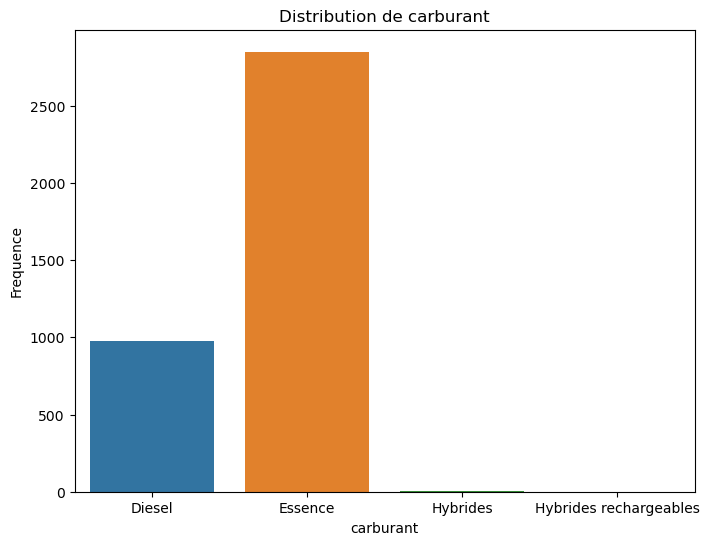

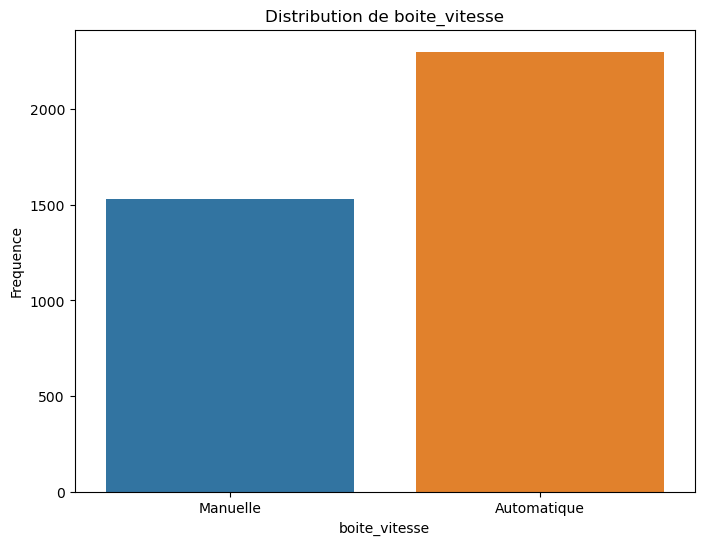

In [ ]:
var=['carburant','boite_vitesse']

for col in var:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df,x=col,hue=col)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)  
    plt.ylabel("Frequence")
    plt.show()

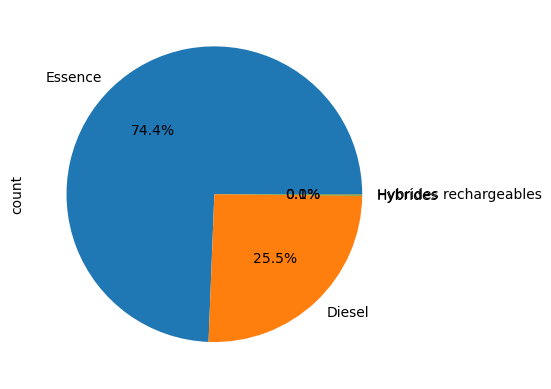

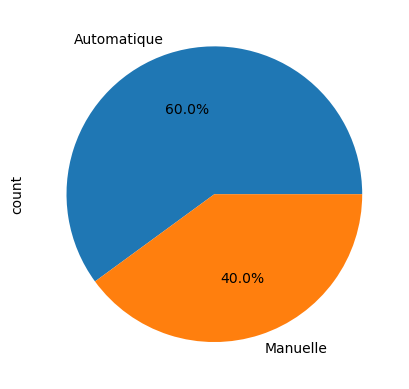

In [ ]:
for col in ['carburant','boite_vitesse']:
    plt.figure()
    #df[col].value_counts().plot.pie()
    df[col].value_counts().plot.pie(autopct='%1.1f%%')

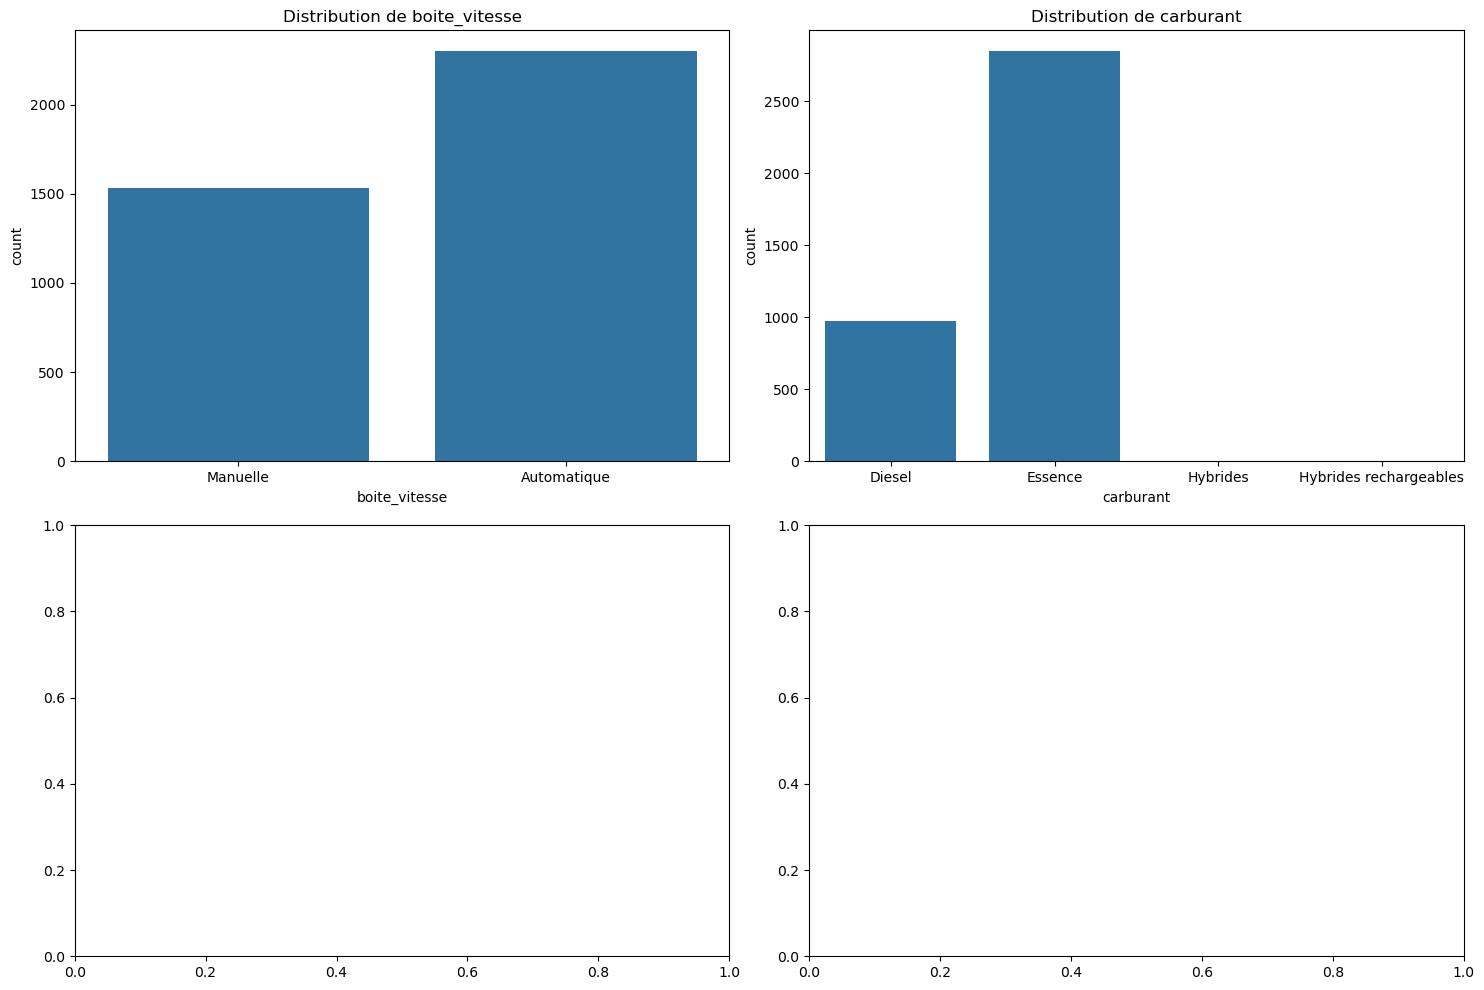

In [64]:
variables = ['boite_vitesse','carburant']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten() 

for ax, var in zip(axes, variables):
    sns.countplot(x=df[var], ax=ax)
    ax.set_title(f'Distribution de {var}')

plt.tight_layout()
plt.show()

In [ ]:
top_marques = df['marque'].value_counts().nlargest(5).reset_index()
top_marques

,marque,count
0,Ford,840
1,Hyundai,358
2,Peugeot,309
3,Toyota,281
4,Kia,199


Text(0.5, 0, 'Marque')

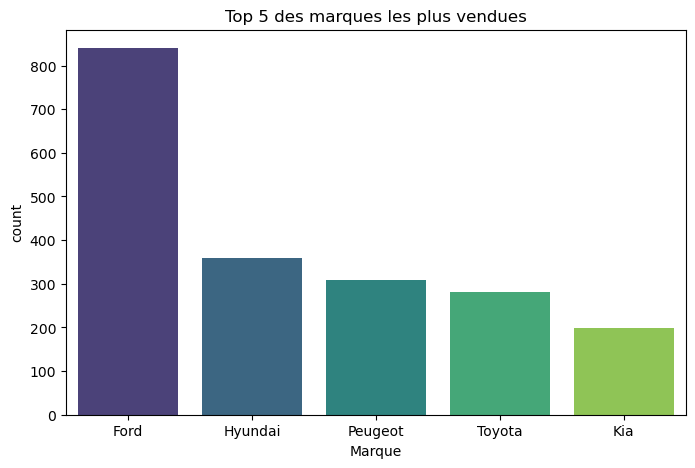

In [ ]:
top_marques = df['marque'].value_counts().nlargest(5).reset_index()


# Diagramme à barres
plt.figure(figsize=(8, 5))
sns.barplot(data=top_marques, x='marque',y='count', hue='marque',palette='viridis')
plt.title("Top 5 des marques les plus vendues")
plt.xlabel("Marque")

<Axes: >

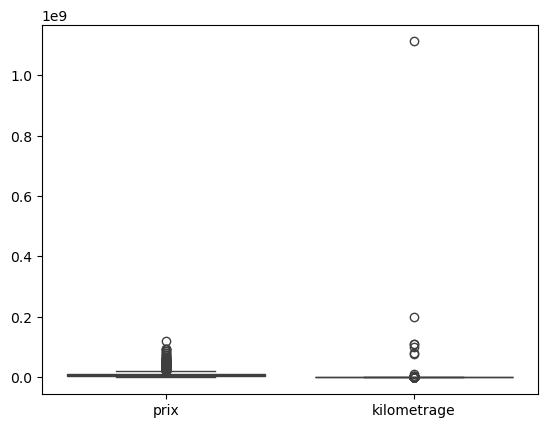

In [80]:
sns.boxplot(df[["prix","kilometrage"]])

<Axes: ylabel='prix'>

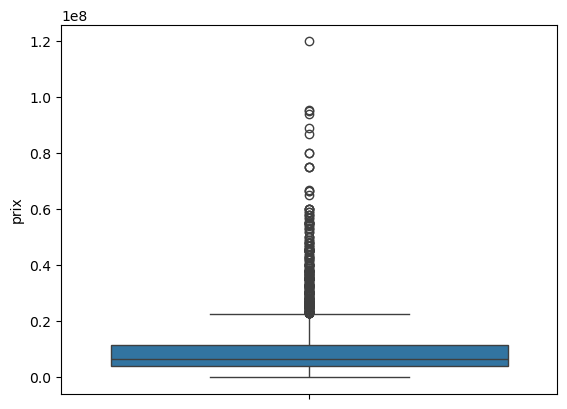

In [78]:
sns.boxplot(df["prix"])

<Axes: ylabel='prix'>

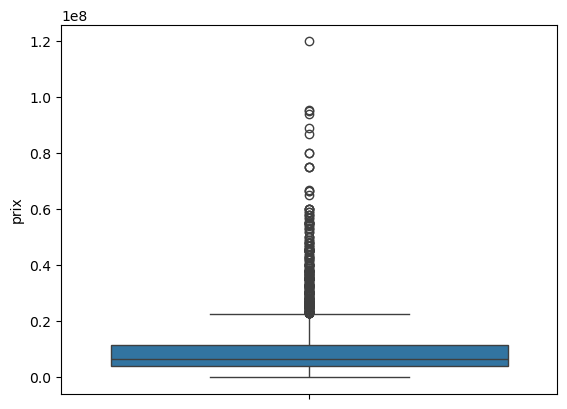

In [79]:
sns.boxplot(df["prix"])

<Axes: xlabel='prix', ylabel='Count'>

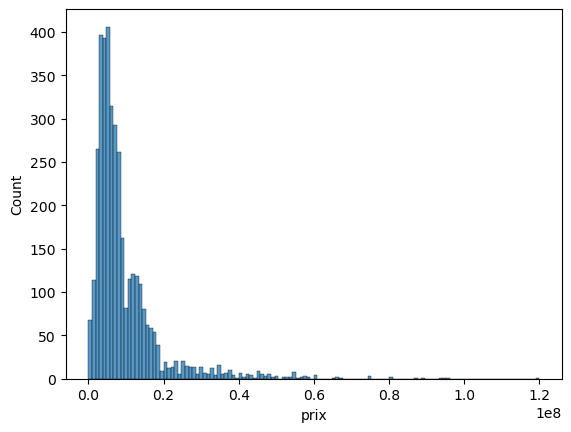

In [83]:
sns.histplot(df['prix'])

<Axes: xlabel='kilometrage', ylabel='Count'>

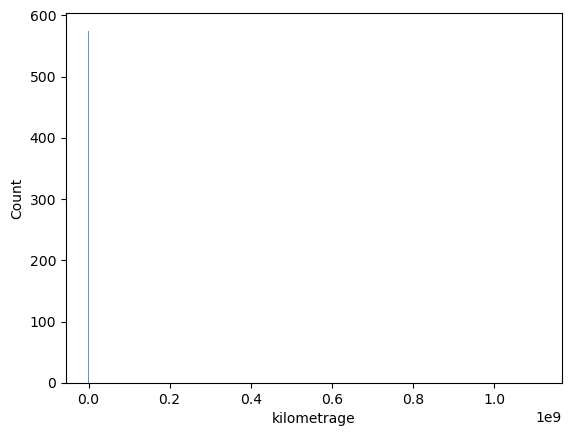

In [84]:
sns.histplot(df['kilometrage'])

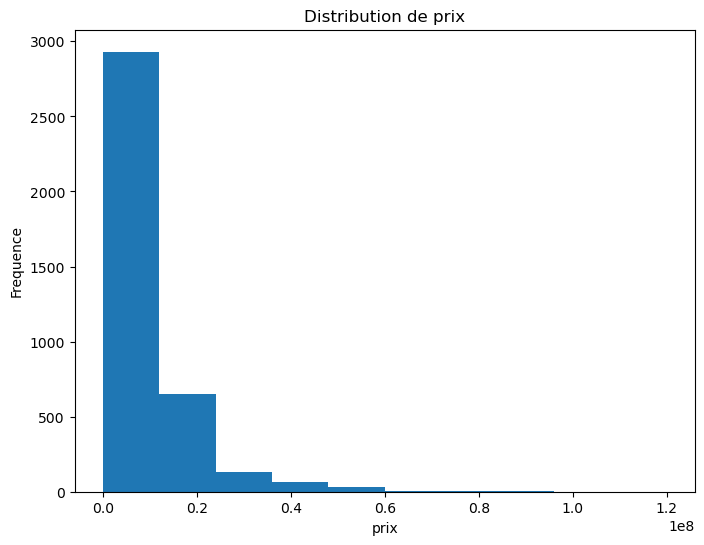

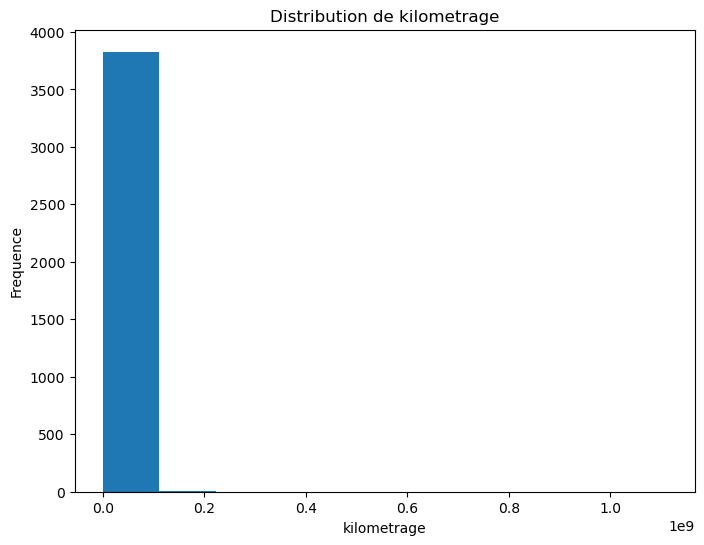

In [85]:
for col in df.select_dtypes(include="int").columns:
    plt.figure(figsize=(8,6))
    plt.hist(df[col])
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)  
    plt.ylabel("Frequence")
    plt.show()

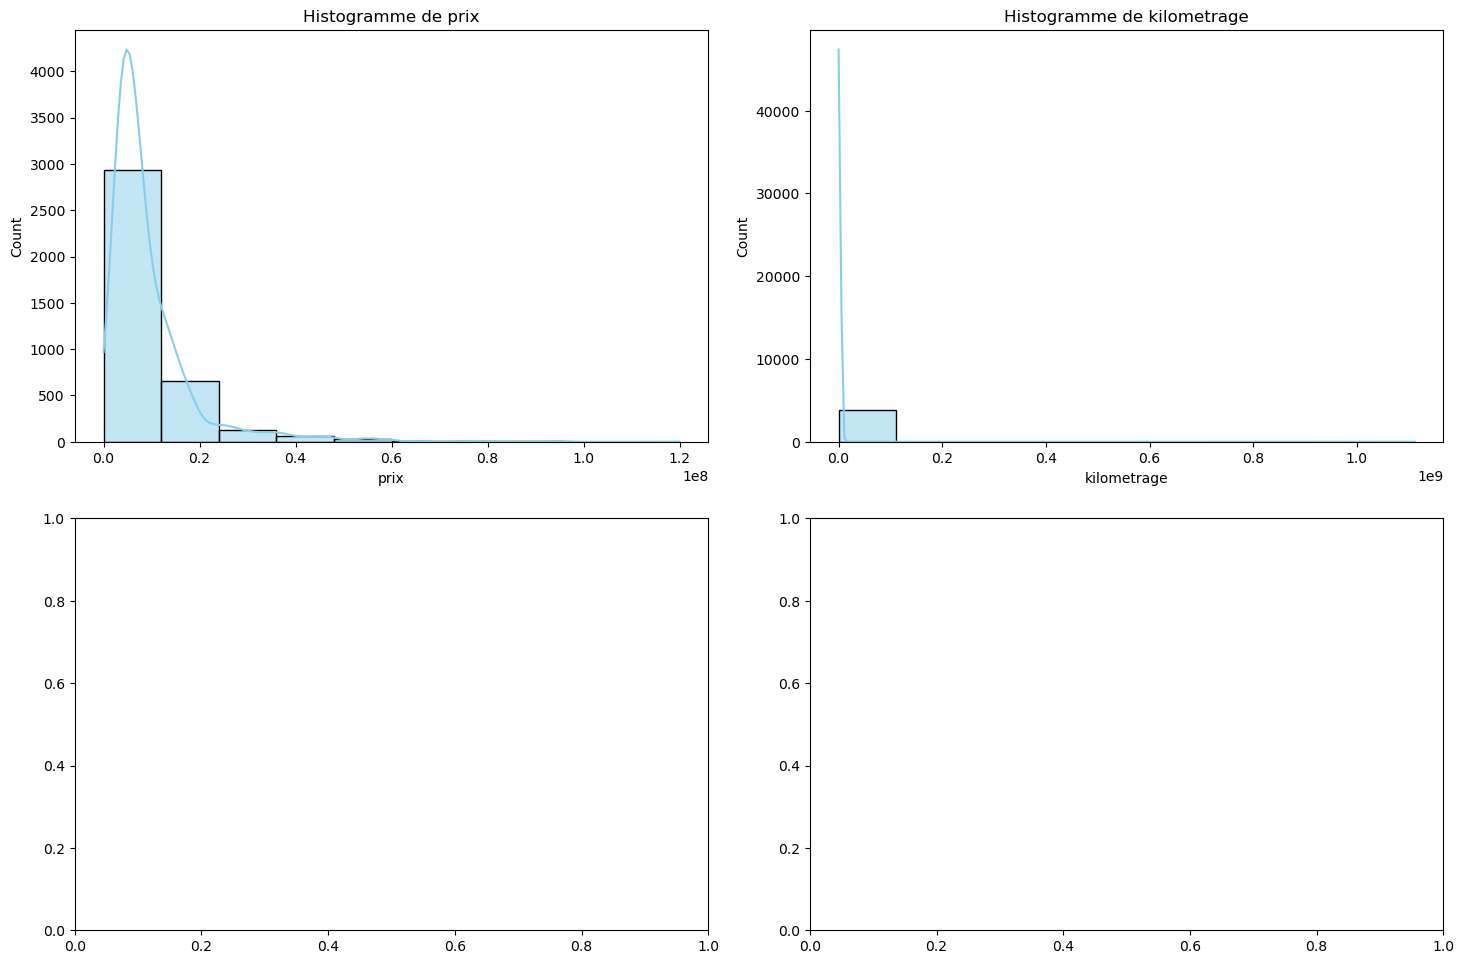

In [86]:
import seaborn  as sns

num_vars = df.select_dtypes(include="int").columns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for ax, var in zip(axes, num_vars):
    sns.histplot(df[var], kde=True, bins=10, color='skyblue', ax=ax)
    ax.set_title(f'Histogramme de {var}')

plt.tight_layout(pad=2)